# Time Series Coursera

## Week 1

In [2]:
install.packages("dplyr", repos="https://cran.stat.auckland.ac.nz/")
install.packages("ggpubr", repos="https://cran.stat.auckland.ac.nz/")
install.packages("GGally", repos="https://cran.stat.auckland.ac.nz/")


Installing package into 'C:/Users/mitro/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mitro\AppData\Local\Temp\RtmpIzdsoK\downloaded_packages


Installing package into 'C:/Users/mitro/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mitro\AppData\Local\Temp\RtmpIzdsoK\downloaded_packages


Installing package into 'C:/Users/mitro/OneDrive/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mitro\AppData\Local\Temp\RtmpIzdsoK\downloaded_packages


In [8]:
library("dplyr")
library("ggpubr")
library("ggplot2")



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Loading required package: magrittr


### Summary Statistics

c() is the concatenation operator for r, this is how you stick datasets together.

In [4]:
data.1=c(35, 8, 10, 23, 42)
print(data.1)

[1] 35  8 10 23 42


There are ways to get the summary statistics using summary() or single statistics such as mean or standard deviation.

In [5]:
summary(data.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    10.0    23.0    23.6    35.0    42.0 

In [6]:
mean(data.1)

[1] 23.6

In [7]:
sd(data.1)

[1] 14.97665

### Histograms

R is able to do nice histograms, which you can customise. There are a number of ways to do histograms.

In [8]:
small.size.dataset=c(91,49,76,112,97,42,70, 100, 8, 112, 95, 90, 78, 62, 56, 94, 65, 58, 109, 70, 109, 91, 71, 76, 68, 62, 134, 57, 83, 66)


Below shows how to do it with the hist function. 

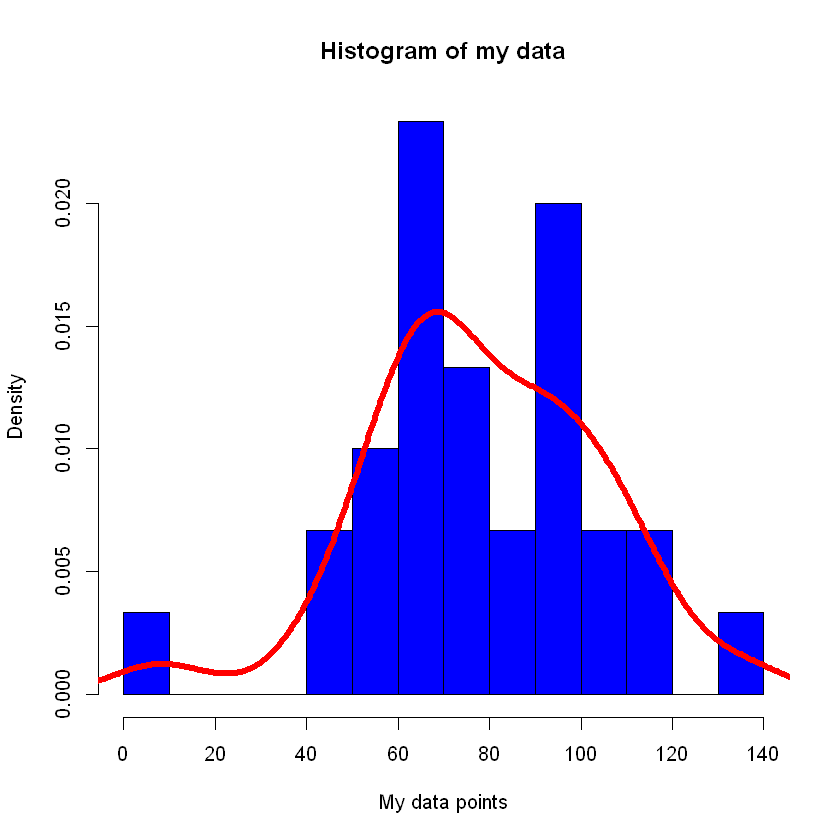

In [9]:
hist(small.size.dataset, xlab='My data points', main='Histogram of my data', freq=F, col='blue', breaks=10)
lines(density(small.size.dataset), col='red', lwd=5)

There are other ways to do histograms as well, such as using the ggplot2 library. 

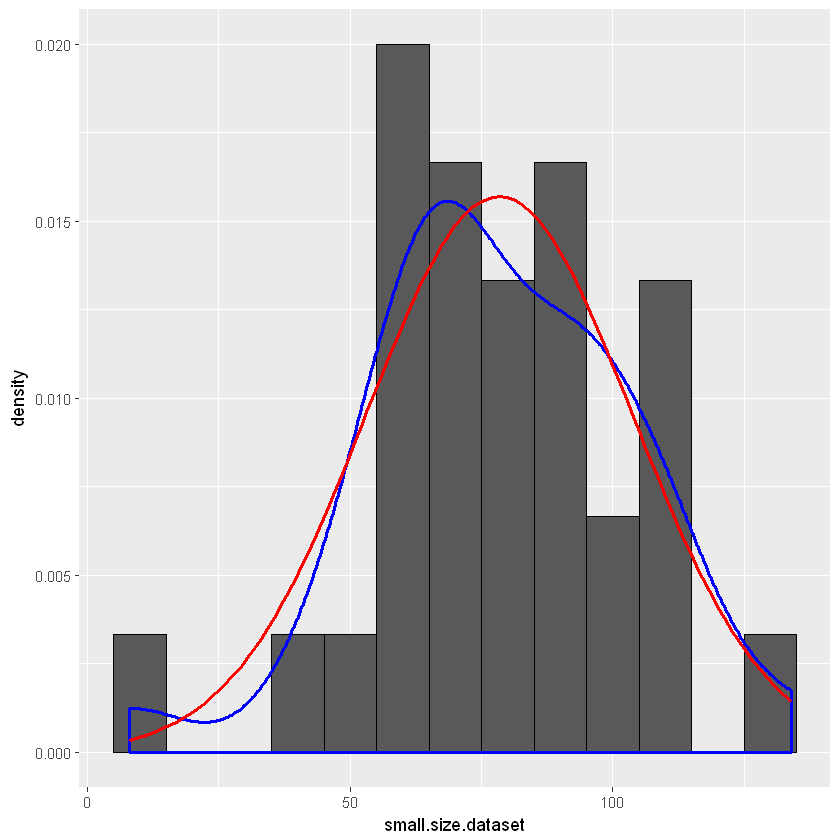

In [10]:

df.small.size.dataset <- data.frame(small.size.dataset)
base <- ggplot(df.small.size.dataset, aes(small.size.dataset))  + geom_histogram(colour="black", aes(y=..density..), binwidth=10) + geom_density(colour = "blue", lwd=1)
base + stat_function(fun = dnorm, colour = "red", lwd=1, args = list(mean = mean(small.size.dataset), sd = sd(small.size.dataset)))


### Scatterplots

Its fairly easy to do scatterplots

In [11]:
set.seed=2016
Test_1_scores=round(rnorm(50,78,10))
Test_2_scores=round(rnorm(50,70,14))
Test_1_scores

[1] 79 71 60 99 74 90 87 71 75 81 84 88 91 73 82 76 81 85 59 79 67 91 76 69 71
[26] 79 65 75 73 87 93 81 83 61 89 76 68 61 85 87 78 58 77 71 78 80 58 73 78 78

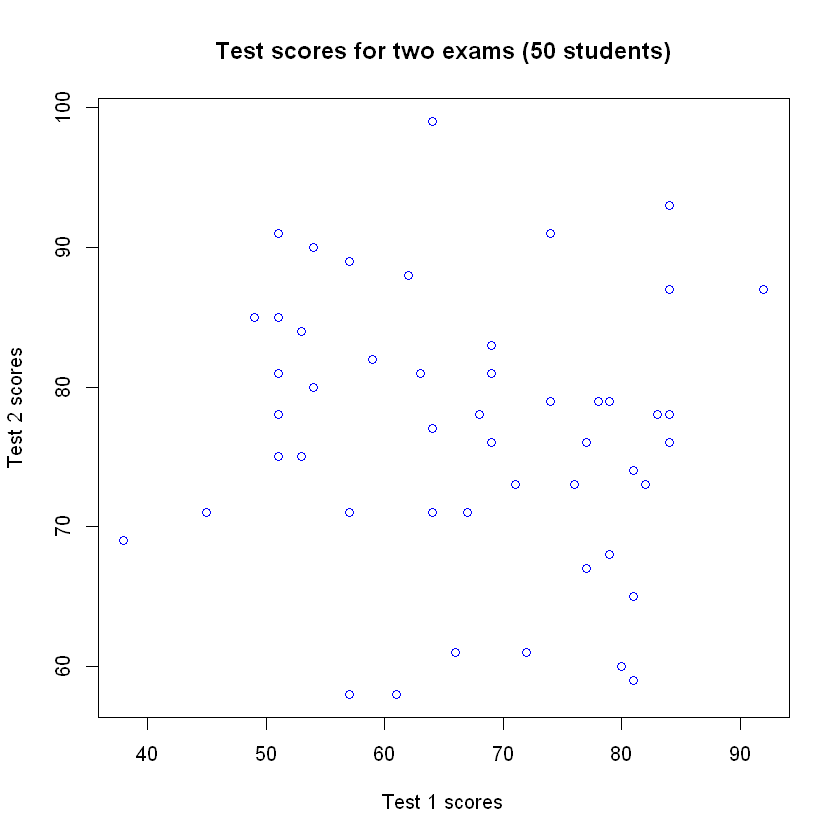

In [12]:
plot(Test_2_scores, Test_1_scores, main='Test scores for two exams (50 students)', xlab='Test 1 scores', ylab='Test 2 scores', col='blue')


### Mauna Loa Atmospheric co2 Concentration Excersise

Its important that the data we deal with is classed as a time series

In [13]:
class(co2) # shows as a ts class

[1] "ts"

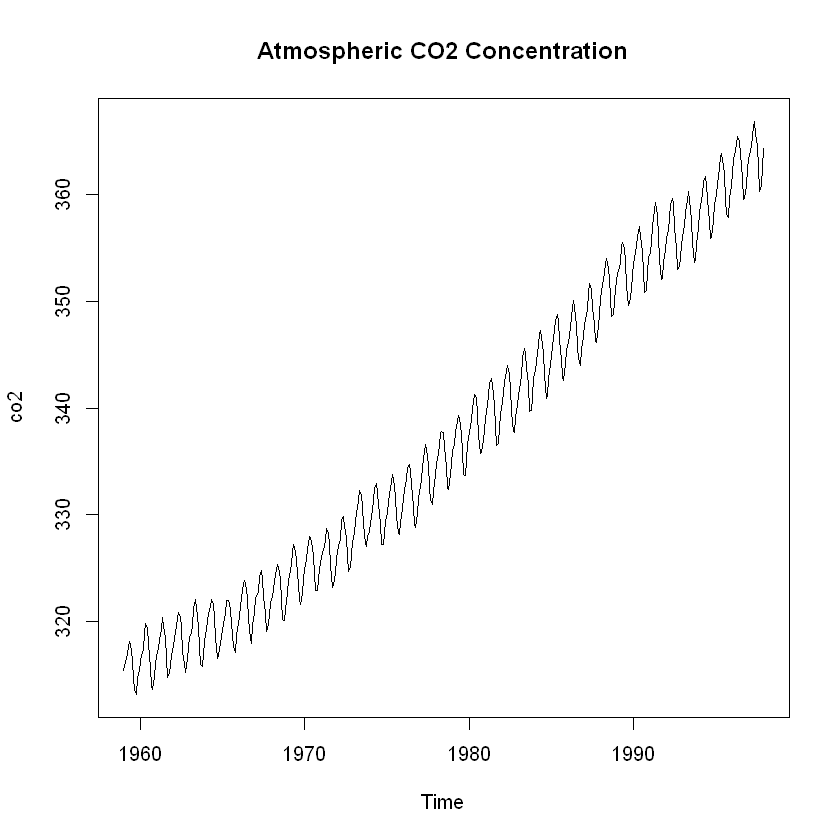

In [14]:

plot(co2, main='Atmospheric CO2 Concentration')

CO2 concentration is apparently increasing with time over this period. Also, even though a straight line obviously misses some crucial behavior it isn’t entirely useless in that it can be used to model the trend in the data. 

#### Linear model of data

In [15]:
co2.linear.model = lm(co2 ~ time(co2))

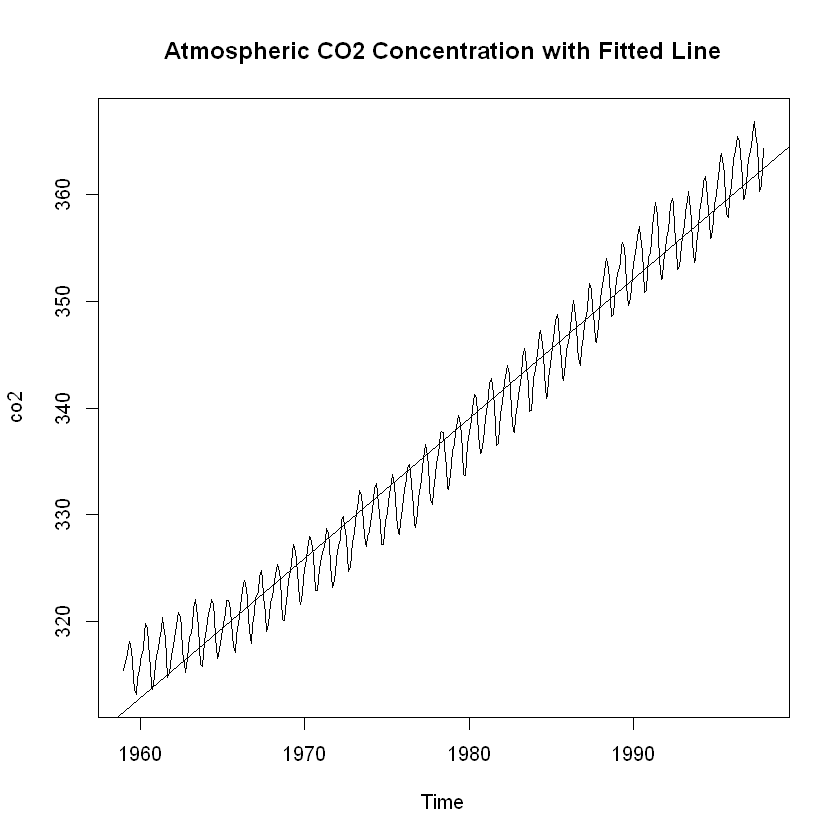

In [16]:
plot(co2, main='Atmospheric CO2 Concentration with Fitted Line') 
abline(co2.linear.model ) 

## Residuals

Its important to note that there are 3 assumptions for the errors (residuals) when fitting linear models.
    - normal distribution
    - same variance over the x value
    - errors are uncorrelated

Look at the residuals. The residuals should be normally distributed.

If you only have a few data points - Histograms are not great to help with validating the assumption of normality.

qq plots are better. If you see deviations from this straight line then you would question the normality assumption. Is it systematic, or a few random points?

In [17]:
( co2.residuals = resid( co2.linear.model ) )

1            2            3            4            5            6 
 3.808180799  4.589222742  4.670264684  5.621306627  6.082348569  5.843390511 
           7            8            9           10           11           12 
 4.124432454  2.275474396  1.196516339  0.587558281  1.958600224  2.619642166 
          13           14           15           16           17           18 
 3.350684109  3.781726051  4.282767993  5.623809936  6.514851878  5.965893821 
          19           20           21           22           23           24 
 4.436935763  2.057977706  0.209019648 -0.219938409  0.831103533  1.912145475 
          25           26           27           28           29           30 
 2.503187418  3.204229360  3.935271303  4.756313245  5.757355188  4.838397130 
          31           32           33           34           35           36 
 3.539439072  1.640481015 -0.268477043 -0.047435100  0.623606842  1.424648785 
          37           38           39           40           41           42 
 2.245690727  2.756732670  3.777774612  4.558816554  4.879858497  4.370900439 
          43           44           45           46           47           48 
 3.261942382  0.952984324 -0.295973733 -1.244931791 -0.093889848  0.797152094 
          49           50           51           52           53           54 
 1.738194036  1.969235979  2.640277921  4.051319864  4.802361806  3.923403749 
          55           56           57           58           59           60 
 2.084445691  0.005487633 -1.663470424 -1.992428482 -1.021386539  0.159655403 
          61           62           63           64           65           66 
 1.260697346  1.811739288  2.372781231  2.923823173  3.474865115  3.035907058 
          67           68           69           70           71           72 
 1.466949000 -0.372009057 -2.480967115 -2.419925172 -1.708883230 -0.797841287 
          73           74           75           76           77           78 
-0.186799345  0.714242597  1.055284540  2.186326482  2.107368425  1.708410367 
          79           80           81           82           83           84 
 0.939452310 -1.509505748 -2.668463806 -3.297421863 -1.846379921 -1.405337978 
          85           86           87           88           89           90 
-0.304296036  0.556745907  1.247787849  2.448829792  2.709871734  2.280913676 
          91           92           93           94           95           96 
 0.821955619 -1.327002439 -3.155960496 -3.804918554 -2.223876611 -1.092834669 
          97           98           99          100          101          102 
 0.098207274  0.159249216  0.590291158  1.851333101  2.322375043  1.313416986 
         103          104          105          106          107          108 
-0.345541072 -2.074499129 -3.843457187 -3.812415245 -2.601373302 -1.470331360 
         109          110          111          112          113          114 
-0.979289417 -0.498247475  0.132794468  1.153836410  1.584878353  1.275920295 
         115          116          117          118          119          120 
-0.053037763 -2.191995820 -4.070953878 -4.269911935 -3.308869993 -1.837828050 
         121          122          123          124          125          126 
-0.856786108 -0.535744165  0.565297777  1.486339719  2.087381662  1.308423604 
         127          128          129          130          131          132 
 0.379465547 -1.949492511 -3.338450568 -4.047408626 -3.086366684 -1.935324741 
         133          134          135          136          137          138 
-1.104282799 -0.283240856  0.557801086  1.648843029  1.479884971  0.960926914 
         139          140          141          142          143          144 
-0.468031144 -2.226989202 -3.935947259 -4.074905317 -3.233863374 -2.232821432 
         145          146          147          148          149          150 
-1.291779489 -0.900737547 -0.509695605 -0.008653662  1.022388280  0.553430223 
         151          152          153          154          

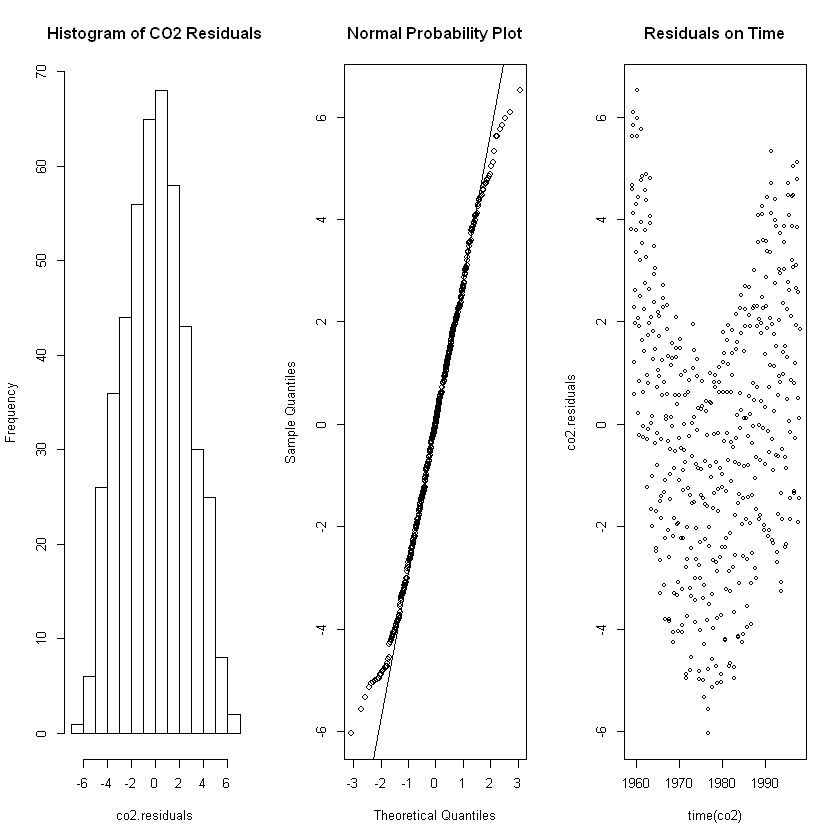

In [18]:
par(mfrow=c(1,3)) 
hist(co2.residuals, main= "Histogram of CO2 Residuals")
qqnorm(co2.residuals, main= "Normal Probability Plot")
qqline(co2.residuals)
plot(co2.residuals ~ time(co2), main="Residuals on Time") 

In [19]:
set.seed(1234)
df.co2.residuals <- data.frame(co2.residuals)
dplyr::sample_n(df.co2.residuals, 10)

co2.residuals
54   3.9234037   
291 -0.2796559   
284 -2.7969495   
290 -0.7506978   
400  3.9839158   
297 -4.1734042   
5    6.0823486   
108 -1.4703314   
307  0.2670152   
237 -4.7259208

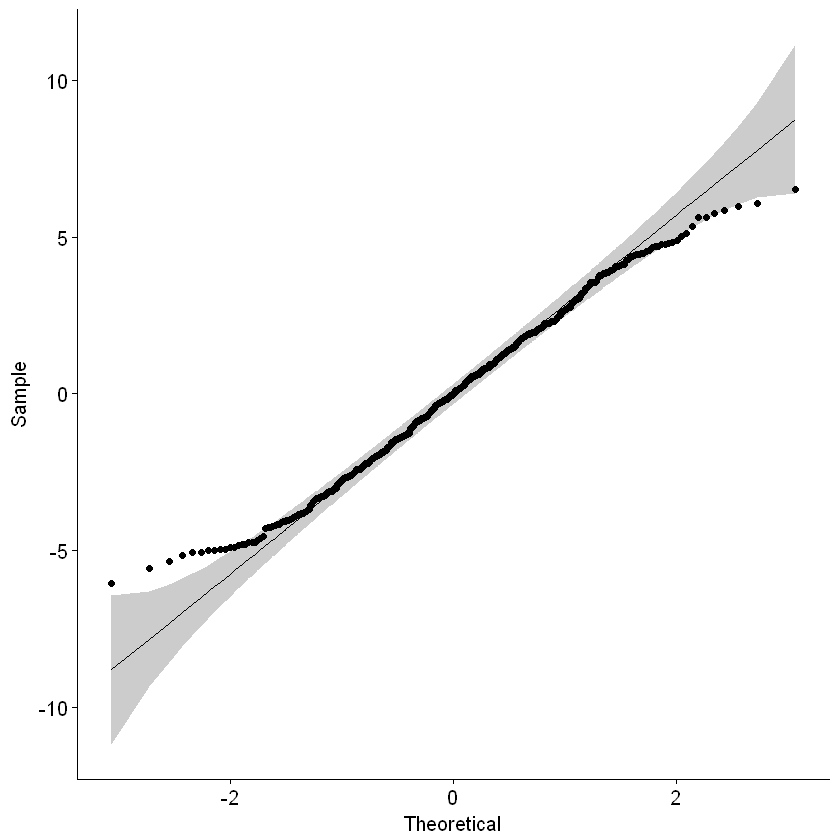

In [20]:
ggqqplot(co2.residuals)

In [21]:
shapiro.test(co2.residuals)


	Shapiro-Wilk normality test

data:  co2.residuals
W = 0.99086, p-value = 0.005408


In [22]:
mean(co2.residuals)
sd(co2.residuals)
xnorm <- rnorm(10,mean(co2.residuals), sd(co2.residuals))
ks.test(co2.residuals, xnorm)

[1] 5.970975e-16

[1] 2.615258


	Two-sample Kolmogorov-Smirnov test

data:  co2.residuals and xnorm
D = 0.35812, p-value = 0.1249
alternative hypothesis: two-sided


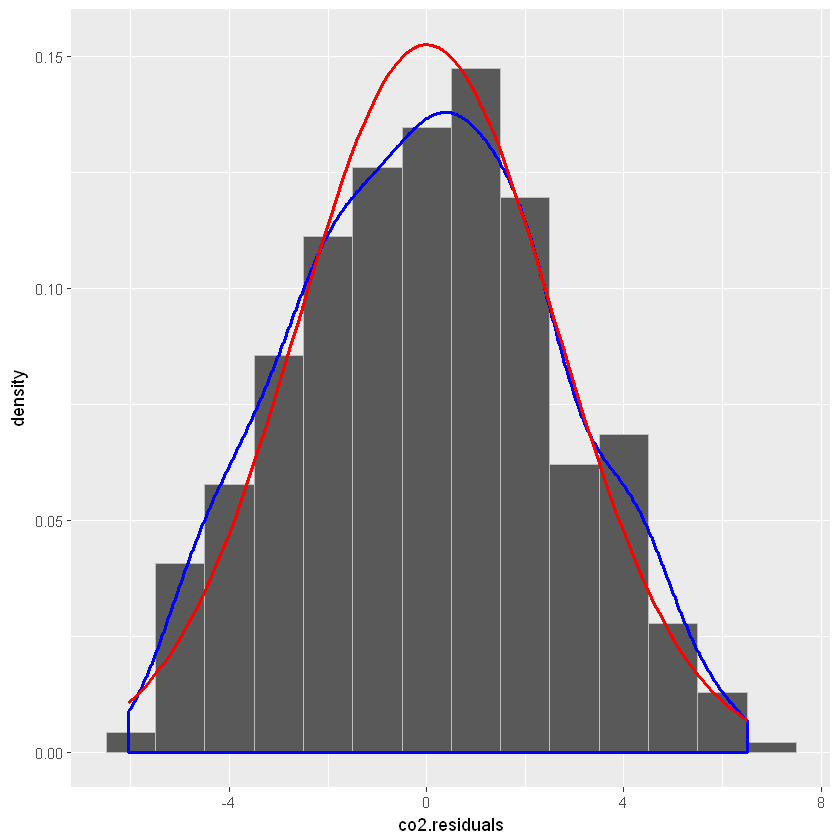

In [23]:



base <- ggplot(df.co2.residuals, aes(co2.residuals))  + geom_histogram(colour="grey", aes(y=..density..), binwidth=1) + geom_density(colour = "blue", lwd=1)
base + stat_function(fun = dnorm, colour = "red", lwd=1, args = list(mean = mean(co2.residuals), sd = sd(co2.residuals)))


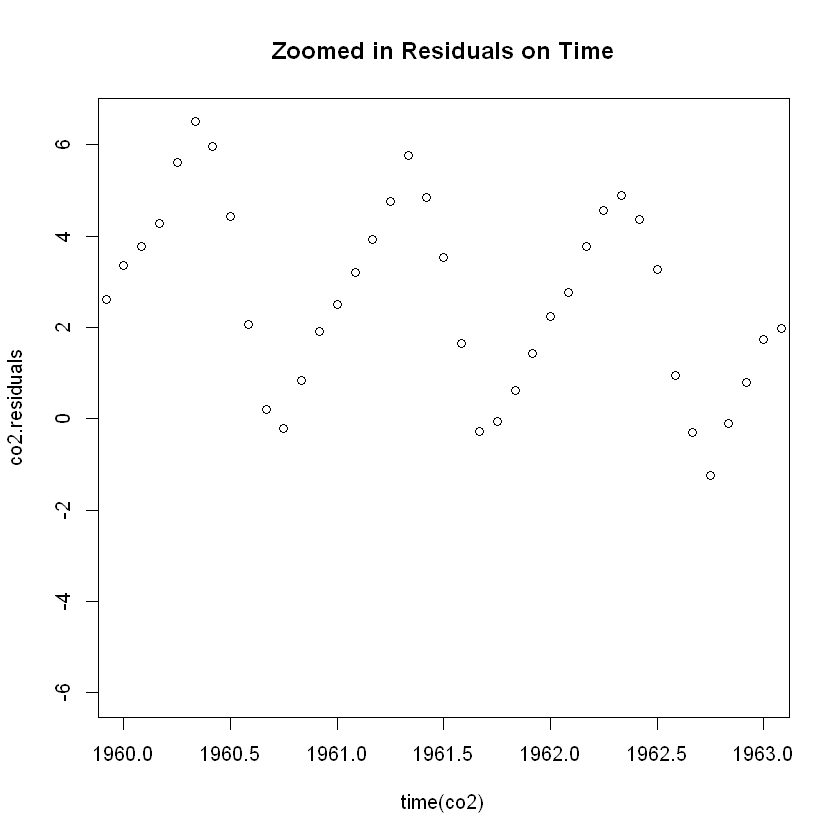

In [24]:
plot(co2.residuals ~ time(co2), xlim=c(1960, 1963), main="Zoomed in Residuals on Time") 

## Inference

### Sleep dataset

For this test we will do a 2 sided t test - we have no intuition or theory that one will be bigger than the other. So we are basically saying "not the same". 

Type one error, the probability that we will reject a true null hypothesis.

In [25]:
sleep

extra group ID
1   0.7  1     1 
2  -1.6  1     2 
3  -0.2  1     3 
4  -1.2  1     4 
5  -0.1  1     5 
6   3.4  1     6 
7   3.7  1     7 
8   0.8  1     8 
9   0.0  1     9 
10  2.0  1     10
11  1.9  2     1 
12  0.8  2     2 
13  1.1  2     3 
14  0.1  2     4 
15 -0.1  2     5 
16  4.4  2     6 
17  5.5  2     7 
18  1.6  2     8 
19  4.6  2     9 
20  3.4  2     10

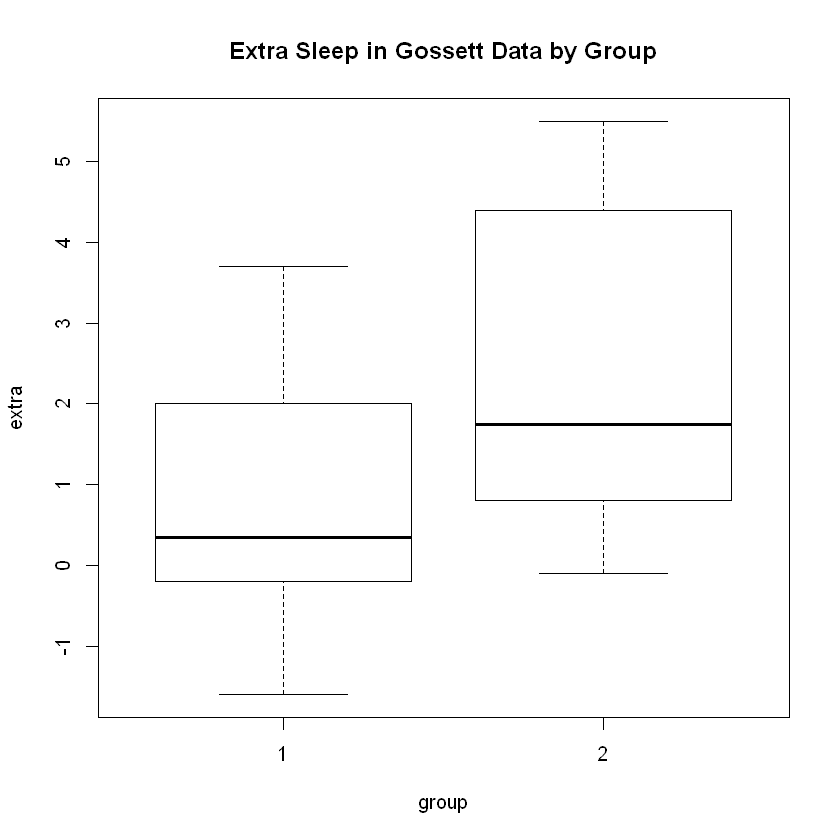

In [26]:
plot(extra~group, data=sleep, main = "Extra Sleep in Gossett Data by Group")

If you are tired of typing the dollar sign to access a variable, you can “attach” the data frame as

In [27]:
attach(sleep)

The following creates 2 lists of each group.

In [28]:
extra.1=extra[group==1] 
extra.2=extra[group==2] 

In [29]:
extra.1

[1]  0.7 -1.6 -0.2 -1.2 -0.1  3.4  3.7  0.8  0.0  2.0

In [30]:
t.test(extra.1, extra.2, paired=TRUE, alternative="two.sided") 


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


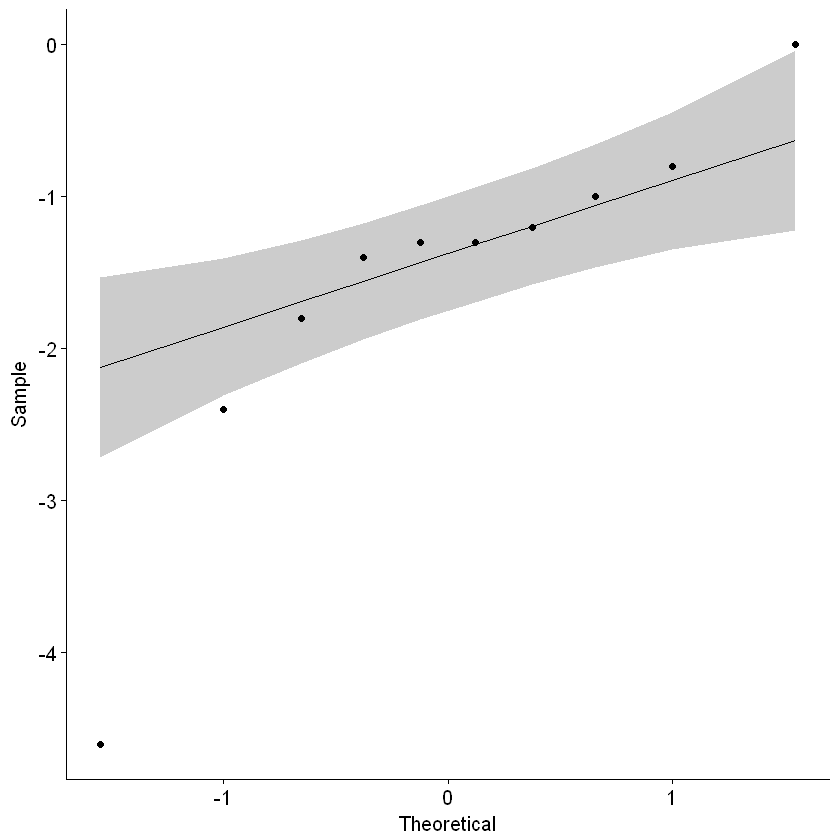

In [31]:
diffs = extra.1-extra.2 
ggqqplot(diffs)

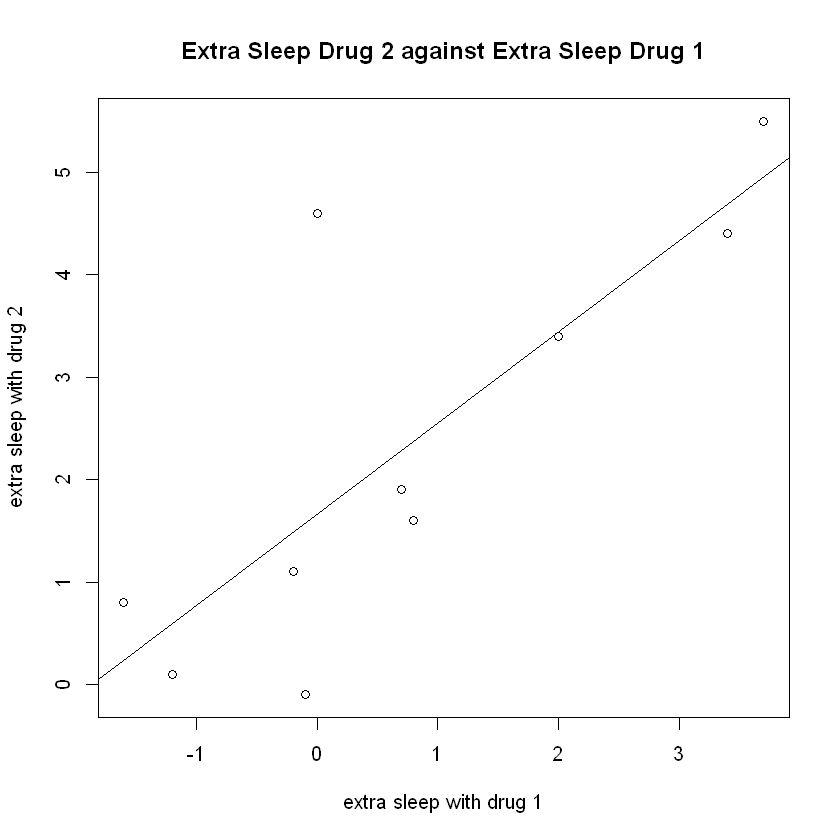

In [32]:
plot(extra.2~extra.1, xlab='extra sleep with drug 1',  ylab='extra sleep with drug 2' ,  main='Extra Sleep Drug 2 against Extra Sleep Drug 1')
sleep.linear.model = lm(extra.2 ~ extra.1 )
abline(sleep.linear.model) 

In [33]:
summary(sleep.linear.model) 


Call:
lm(formula = extra.2 ~ extra.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6735 -0.4673 -0.3365  0.3979  2.9375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.6625     0.4452   3.734  0.00575 **
extra.1       0.8899     0.2399   3.709  0.00596 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.288 on 8 degrees of freedom
Multiple R-squared:  0.6323,	Adjusted R-squared:  0.5863 
F-statistic: 13.76 on 1 and 8 DF,  p-value: 0.005965


In [34]:
lm(formula = extra.2 ~ extra.1) 


Call:
lm(formula = extra.2 ~ extra.1)

Coefficients:
(Intercept)      extra.1  
     1.6625       0.8899  


## Measuring Linear Association

In [ ]:
This is all about correllations

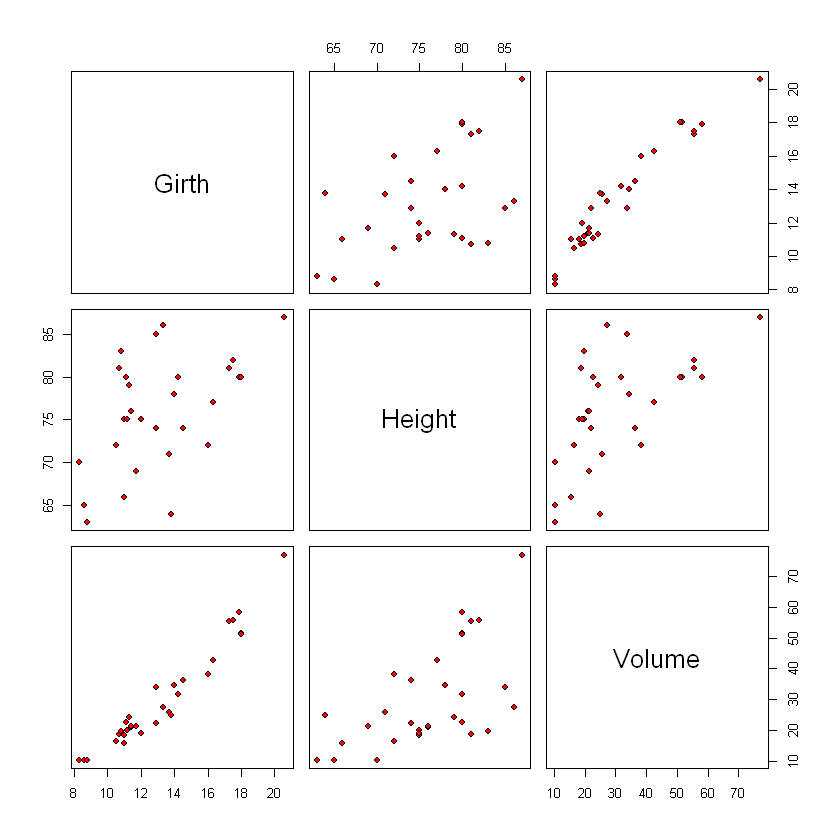

In [36]:
pairs(trees, pch = 21, bg = c("red")) 

Girth     Height    Volume   
Girth  1.0000000 0.5192801 0.9671194
Height 0.5192801 1.0000000 0.5982497
Volume 0.9671194 0.5982497 1.0000000

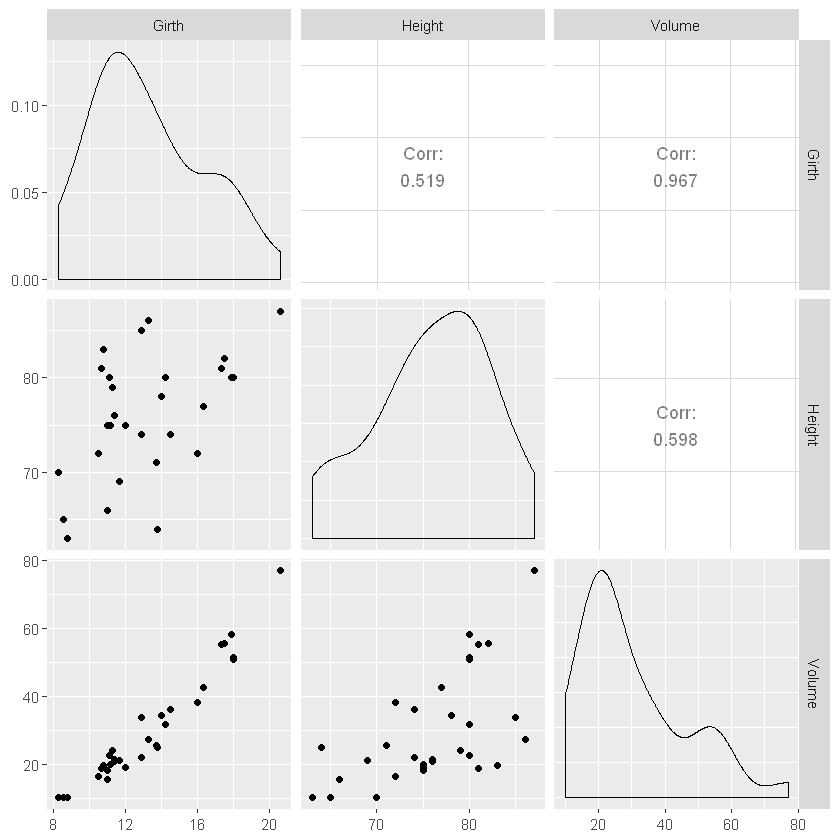

In [38]:
library(GGally)
ggpairs(trees)
cor(trees)

## Week 2

Time Series Correlations

As we are sampling adjacent points in time - there is naturally a correlation. 

### Astsa Time Series Package

In [15]:
install.packages("astsa", repos="https://cran.stat.auckland.ac.nz/")
install.packages("ggfortify", repos="https://cran.stat.auckland.ac.nz/")
install.packages("zoo", repos="https://cran.stat.auckland.ac.nz/")

Installing package into 'C:/Users/tim.roberts/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'astsa' is in use and will not be installed"Installing package into 'C:/Users/tim.roberts/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'ggfortify' is in use and will not be installed"Installing package into 'C:/Users/tim.roberts/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tim.roberts\AppData\Local\Temp\RtmpScUIkO\downloaded_packages


In [12]:
library(astsa)

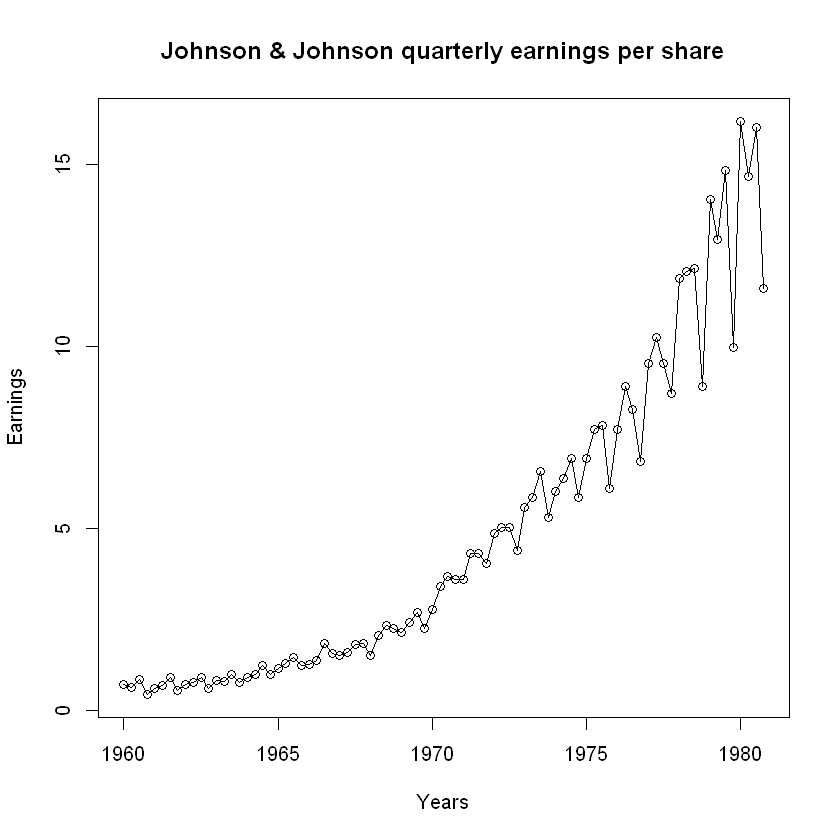

In [4]:
plot(jj, type = 'o', main='Johnson & Johnson quarterly earnings per share', ylab='Earnings', xlab = 'Years')

To make it look a bit better its best to use the ggfortify package.

https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_ts.html
http://neondataskills.org/R/time-series-plot-ggplot/

In [ ]:
library(ggfortify)
library(zoo)

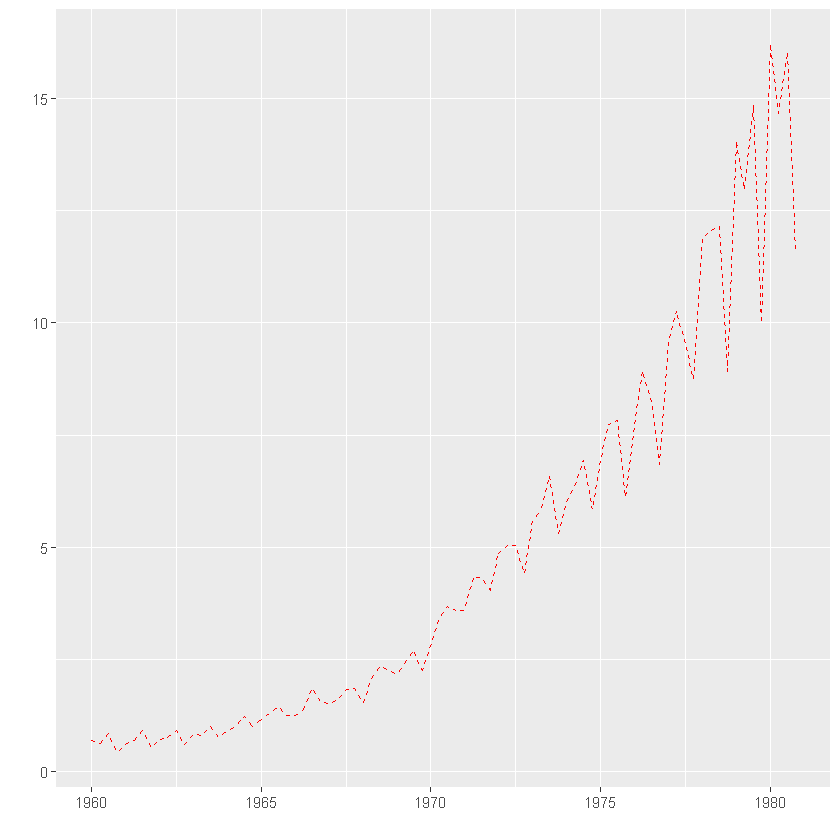

In [21]:
autoplot(jj, ts.colour = 'red', ts.linetype = 'dashed')

In [24]:
flu

           Jan       Feb       Mar       Apr       May       Jun       Jul
1968 0.8113721 0.4458291 0.3415985 0.2774243 0.2484958 0.2525427 0.2466902
1969 0.8192756 0.4376872 0.3834813 0.2919304 0.2556420 0.2369918 0.2495123
1970 0.4932865 0.5692177 0.3593959 0.2741868 0.2424912 0.2241473 0.2280840
1971 0.3743171 0.3746391 0.3398281 0.2909505 0.2403667 0.2269297 0.2134564
1972 0.6381312 0.5195216 0.2968231 0.2514277 0.2144966 0.1964111 0.2343862
1973 0.5968794 0.5156948 0.3085772 0.2569596 0.2194814 0.2158074 0.2240929
1974 0.3096678 0.3330646 0.3497020 0.3066515 0.2238370 0.2030033 0.2231299
1975 0.4937200 0.4728154 0.3094317 0.2343683 0.2007220 0.1906996 0.1877136
1976 0.2902977 0.5702096 0.6384278 0.3135166 0.2047724 0.1885323 0.1798065
1977 0.2817310 0.3030367 0.2915253 0.2453148 0.2051037 0.1845583 0.2046436
1978 0.5712671 0.4351815 0.2825850 0.2381904 0.2196089 0.1904820 0.1926964
           Aug       Sep       Oct       Nov       Dec
1968 0.2452006 0.2279679 0.2610293 0.3177998 

ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. by_layer(function(l, d

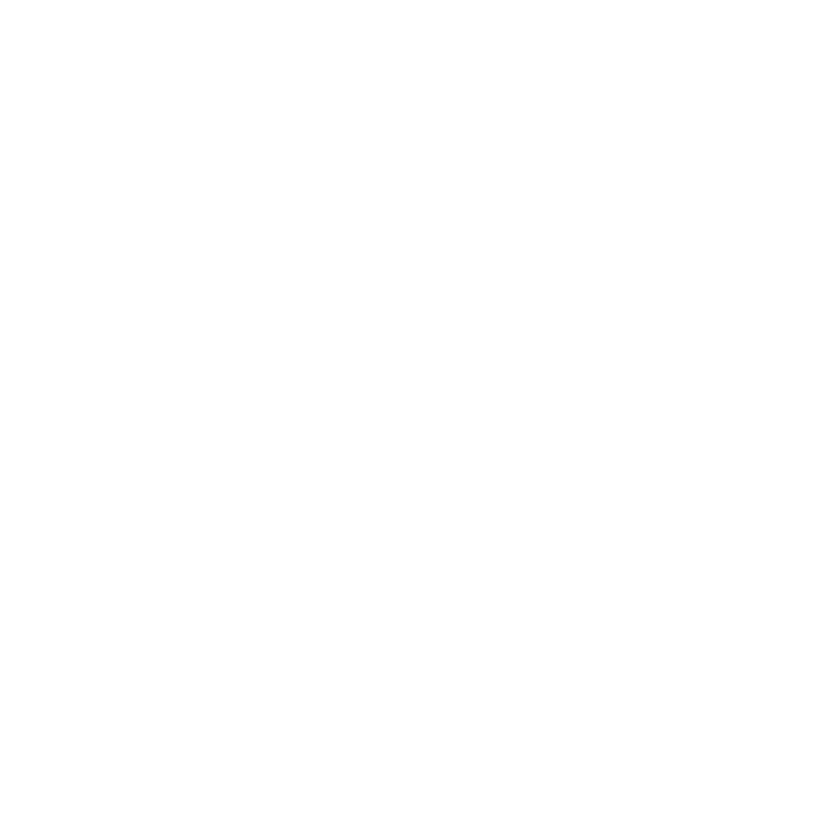

In [28]:
autoplot(flu, ts.colour = 'blue') + geom_point(aes())